In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import torch

In [3]:
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['text.usetex'] = False
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)
mpl.rcParams['figure.dpi'] = 300

In [4]:
import sys
sys.path.append("..")

In [5]:
# Import the various experiments we need for the notebook
from sva.experiments import Simple2d, PolicyPerformanceEvaluator

# Import the seeding function for reproducibility
from sva.utils import seed_everything

/Users/mc/miniforge3/envs/py3.11-sva/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch default dtype set to torch.float64
torch default device set to cpu


# A simple 2d example

In [6]:
experiment = Simple2d()
experiment.initialize_data(n=5, protocol="random")

In [55]:
x = experiment.get_dense_coordinates(ppd=100)
y, _ = experiment(x)
x[y.argmax()]

array([ 2., -4.])

In [7]:
acquisition_function_list = ["EI", "UCB", "UCB", "UCB"]
acquisition_function_kwargs_list = [None, {"beta": 2.0}, {"beta": 20.0}, {"beta": 100.0}]

In [8]:
policy_evaluator = PolicyPerformanceEvaluator(experiment)
policy_evaluator.run(20, 5, acquisition_function_list, acquisition_function_kwargs_list)

In [9]:
res = policy_evaluator.process_results()

torch default dtype set to torch.float64
torch default device set to cpu
done with UCB, {'beta': 2.0}, 2
done with UCB, {'beta': 20.0}, 2
torch default dtype set to torch.float64
torch default device set to cpu
done with EI, None, 4
torch default dtype set to torch.float64
torch default device set to cpu
done with EI, None, 0
torch default dtype set to torch.float64
torch default device set to cpu
done with UCB, {'beta': 2.0}, 0
done with UCB, {'beta': 20.0}, 3
torch default dtype set to torch.float64
torch default device set to cpu
done with EI, None, 1
torch default dtype set to torch.float64
torch default device set to cpu
done with UCB, {'beta': 20.0}, 1
done with UCB, {'beta': 100.0}, 0
torch default dtype set to torch.float64
torch default device set to cpu
done with UCB, {'beta': 2.0}, 1
done with UCB, {'beta': 20.0}, 4
torch default dtype set to torch.float64
torch default device set to cpu
done with UCB, {'beta': 2.0}, 4
done with UCB, {'beta': 100.0}, 1
torch default dtype se

In [61]:
x_star = exp.metadata["optima"]["next_points"].numpy()
exp(x_star)

(array([[2.71168424]]), None)

In [38]:
key = list(res.keys())[2]

In [51]:
_exp = res[key][3]["experiment"]

In [52]:
# Get the ground truth results
x = _exp.get_dense_coordinates(ppd=100)
y, _ = _exp(x)

In [53]:
extent = _exp.get_experimental_domain_mpl_extent()

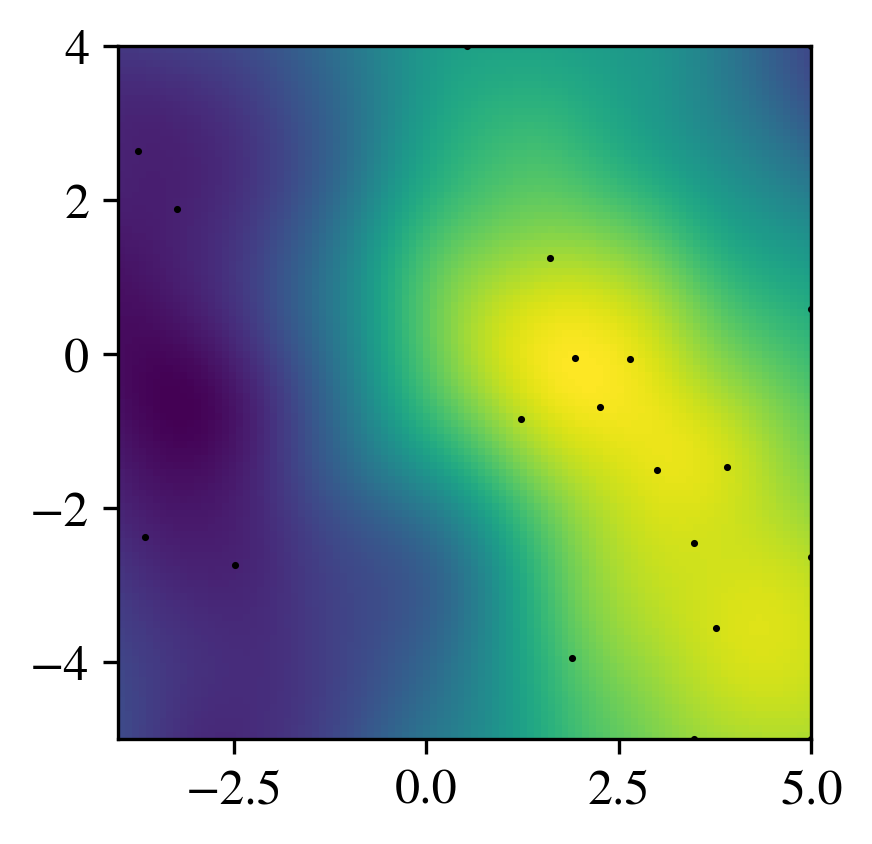

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3), sharex=True, sharey=True)
X, Y = _exp.data.X, _exp.data.Y
ax.imshow(y.reshape(100, 100).T, extent=extent, interpolation='nearest', origin='lower')
ax.scatter(X[:, 0], X[:, 1], color="black", s=0.5)
plt.show()

From left to right, we have EI, UCB(10), UCB(40) and UCB(100).

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(8, 3), sharex=True, sharey=True)

for ii, experiment in enumerate(experiments):
    ax = axs[ii]
    X, Y = experiment.data.X, experiment.data.Y
    ax.imshow(y.reshape(100, 100).T, extent=extent, interpolation='nearest', origin='lower')
    ax.scatter(X[:, 0], X[:, 1], color="black", s=0.5)

plt.show()